In [34]:
import numpy as np
import concrete.numpy as cnp
from time import time

def hamming_distance(x, y, z) -> int:
    one = x & z
    two = y & z
    return np.sum(one ^ two)

class HammingDistance:
    def __init__(self, input_shape, input_max_value) -> None:
        self.inputset = [
            (
                np.random.randint(
                    0, input_max_value + 1, size=input_shape, dtype=np.int64
                ),
                np.random.randint(
                    0, input_max_value + 1, size=input_shape, dtype=np.int64
                ),
                np.random.randint(
                    0, input_max_value + 1, size=input_shape, dtype=np.int64
                ),
            )
            for _ in range(1000)
        ]

        self.configuration = cnp.Configuration(
            enable_unsafe_features=True,
            use_insecure_key_cache=True,
            insecure_key_cache_location=".keys",
        )
        
        self.compiler = cnp.Compiler(
            hamming_distance, {"x": "encrypted", "y": "encrypted", "z": "encrypted"}
        )
        
        self.circuit = self.compiler.compile(self.inputset, self.configuration)
        
        
    def test(self):
        from time import time
        start = time()
        fhe_result = self.circuit.encrypt_run_decrypt(*self.inputset[0])
        clear_result = hamming_distance(*self.inputset[0])
        end = time()
        assert fhe_result == clear_result
        return end - start

In [35]:
HammingDistance(512, 255)

In [53]:
match_stats = {
    4: 95 / 60 / 60,
    8: 143 / 60 / 60,
    # 16: 1124 most probably, the computer went to sleep mode
    32: 647 / 60 / 60,
    # 64: 20740 most probably, the computer went to sleep mode
    128: 2550 / 60 / 60,
    256: 3603 / 60 / 60,
    512: 8937 / 60 / 60,
}

In [54]:
8937 / 60 / 60

2.4825

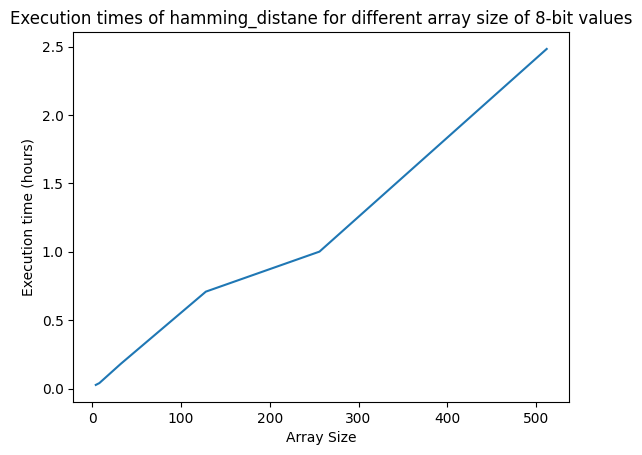

In [55]:
import matplotlib.pyplot as plt
stats = match_stats
# create a line chart
plt.plot(list(stats.keys()), list(stats.values()))

# add labels and title
plt.xlabel('Array Size')
plt.ylabel('Execution time (hours)')
plt.title('Execution times of hamming_distane for different array size of 8-bit values')

# show the plot
plt.show()

In [37]:
stats = {}

In [38]:
# 4, 8, 16, 32, 64, 128, 256, 

In [39]:
cases = [512, 1024, 1536]

In [40]:
from datetime import datetime

In [41]:
for case in cases:
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Hamming distance for {case}')
    hd = HammingDistance(case, 255)
    t = hd.test()
    stats[case] = t
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Hamming distance for {case} took {t} seconds')

[10:41:40]: Hamming distance for 512
[13:10:38]: Hamming distance for 512 took 8937.608634233475 seconds
[13:10:38]: Hamming distance for 1024


RuntimeError: Can't compile: Cannot find crypto parameters

In [32]:
datetime.now().time().strftime("%H:%M:%S")

'14:45:47'

In [8]:
stats = {
    4: 29.65402579307556,
    8: 55.15421748161316,
    16: 138.00227904319763,
    32: 271.8659043312073,
    64: 528.4532215595245,
    128: 1066.6677567958832,
    256: 1228.0822596549988,
}

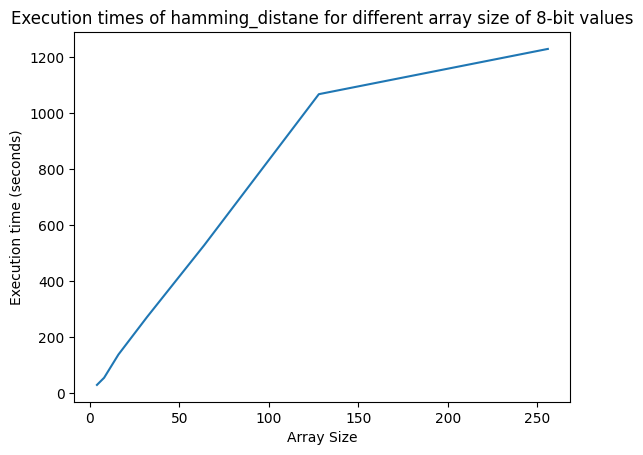

In [9]:
import matplotlib.pyplot as plt

# create a line chart
plt.plot(list(stats.keys()), list(stats.values()))

# add labels and title
plt.xlabel('Array Size')
plt.ylabel('Execution time (seconds)')
plt.title('Execution times of hamming_distane for different array size of 8-bit values')

# show the plot
plt.show()